In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 16.7 s


In [2]:
%%time

saveName = ''

df1 = dSlow.copy()

prr = percolator_reimplementation(df1, idCol, features)

Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/10 done!
Training in iteration 3 with split 1/3 starts!
Training in iteration 3 with split 2/3 starts!
Training in iteration 3 with split 3/3 starts!
Iteration 3/10 done!
Training in iteration 4 with split 1/3 starts!
Training in iteration 4 with split 2/3 starts!
Training in iteration 4 with split 3/3 starts!
Iteration 4/10 done!
Training in iteration 5 with split 1/3 starts!
Training in iteration 5 with split 2/3 starts!
Training in iteration 5 with split 3/3 starts!
Iteration 5/10 done!
Training in iteration 6 with split 1/3 starts!
Training in iteration 6 with split 2/3 starts!
Training in iteration 6 with split 3/3 starts!
Iteration 6/10 done!
Training in iteration 7 with

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3623, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 4012, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4378, length of negative training set: 28396
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 290.3701633137649.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4534, length of negative training set: 28394
Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4733, length of negative training set: 28394
Optimal parameters are C=1

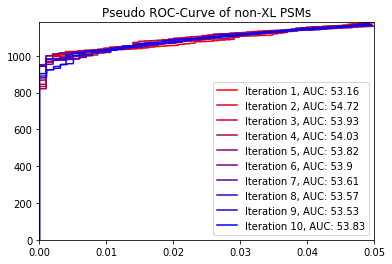

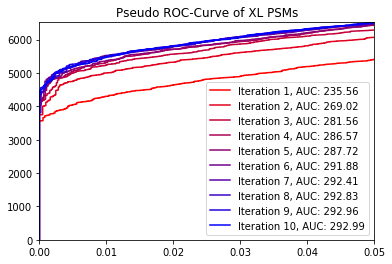

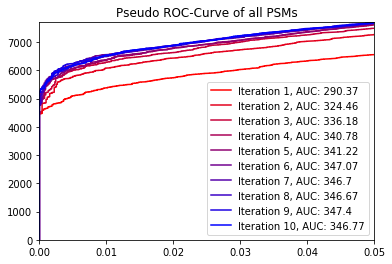

Wall time: 2min 56s


In [3]:
%%time

saveName = ''

df2 = dSlow.copy()

pe = percolator_experimental(df2, idCol, features, plotSaveName = saveName)

In [4]:
%%time

saveName = ''

df3 = dSlow.loc[dSlow.Rank == 1].copy()

prn = percolator_reimplementation(df3, idCol, features)

Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/10 done!
Training in iteration 3 with split 1/3 starts!
Training in iteration 3 with split 2/3 starts!
Training in iteration 3 with split 3/3 starts!
Iteration 3/10 done!
Training in iteration 4 with split 1/3 starts!
Training in iteration 4 with split 2/3 starts!
Training in iteration 4 with split 3/3 starts!
Iteration 4/10 done!
Training in iteration 5 with split 1/3 starts!
Training in iteration 5 with split 2/3 starts!
Training in iteration 5 with split 3/3 starts!
Iteration 5/10 done!
Training in iteration 6 with split 1/3 starts!
Training in iteration 6 with split 2/3 starts!
Training in iteration 6 with split 3/3 starts!
Iteration 6/10 done!
Training in iteration 7 with

In [18]:
ls = [prr,pe,prn, dSlow]

for p in ls:
    print(len(p.loc[(p['q-val'] <= 0.01) & (p.Rank == 1) & (p['NuXL:isXL'] == 1)]))

5121
5535
5503
2860
